# Decathlon Tutorial

In [1]:
library(dbscan)
library(ggplot2)
library(MASS)
library(FactoMineR)
library(repr)
library(scatterplot3d)
library(uwot)
library(kernlab)
library(microbenchmark)
library(fastcluster)


Attaching package: ‘dbscan’


The following object is masked from ‘package:stats’:

    as.dendrogram


Loading required package: Matrix


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha



Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust




In [2]:
set.seed(123)

In [3]:
options(repr.plot.width=6, repr.plot.height=6)

Functions for tSNE.

In [4]:
#source(file = "https://raw.githubusercontent.com/SamueleSoraggi/Projection_and_clustering_tutorial/main/Code/functions.R")
source("functions.R")

In [5]:
data(decathlon)

Cars93 contains Data from 93 Cars on Sale in the USA in 1993. Here we have quite many variables, including multiple labels.

In [6]:
head(decathlon)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar


In [7]:
colnames(decathlon)

[1] "100m"        "Long.jump"   "Shot.put"    "High.jump"   "400m"       
 [6] "110m.hurdle" "Discus"      "Pole.vault"  "Javeline"    "1500m"      
[11] "Rank"        "Points"      "Competition"

Change names starting with numbers (they cause errors)

In [8]:
colnames(decathlon)[c(1,5,6,10)] <- c("sprint.100","sprint.400","hurdle.100","sprint.1500")

In [9]:
colnames(decathlon)

[1] "sprint.100"  "Long.jump"   "Shot.put"    "High.jump"   "sprint.400" 
 [6] "hurdle.100"  "Discus"      "Pole.vault"  "Javeline"    "sprint.1500"
[11] "Rank"        "Points"      "Competition"

Count NAs on rows and columns

In [10]:
sum(apply(decathlon,1,function(x) any(is.na(x)))) #how many rows with NA

[1] 0

In [11]:
sum(apply(decathlon,2,function(x) any(is.na(x)))) #how many columns with NA

[1] 0

Which columns they are (should show only FALSE because there are no NAs)

In [12]:
apply(decathlon,2,function(x) any(is.na(x)))

sprint.100   Long.jump    Shot.put   High.jump  sprint.400  hurdle.100 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE 
     Discus  Pole.vault    Javeline sprint.1500        Rank      Points 
      FALSE       FALSE       FALSE       FALSE       FALSE       FALSE 
Competition 
      FALSE

Change all names to lower case and assign them to a variable `Athlete`.

In [13]:
rownames(decathlon)

[1] "SEBRLE"      "CLAY"        "KARPOV"      "BERNARD"     "YURKOV"     
 [6] "WARNERS"     "ZSIVOCZKY"   "McMULLEN"    "MARTINEAU"   "HERNU"      
[11] "BARRAS"      "NOOL"        "BOURGUIGNON" "Sebrle"      "Clay"       
[16] "Karpov"      "Macey"       "Warners"     "Zsivoczky"   "Hernu"      
[21] "Nool"        "Bernard"     "Schwarzl"    "Pogorelov"   "Schoenbeck" 
[26] "Barras"      "Smith"       "Averyanov"   "Ojaniemi"    "Smirnov"    
[31] "Qi"          "Drews"       "Parkhomenko" "Terek"       "Gomez"      
[36] "Turi"        "Lorenzo"     "Karlivans"   "Korkizoglou" "Uldal"      
[41] "Casarsa"

In [14]:
tolower(rownames(decathlon))

[1] "sebrle"      "clay"        "karpov"      "bernard"     "yurkov"     
 [6] "warners"     "zsivoczky"   "mcmullen"    "martineau"   "hernu"      
[11] "barras"      "nool"        "bourguignon" "sebrle"      "clay"       
[16] "karpov"      "macey"       "warners"     "zsivoczky"   "hernu"      
[21] "nool"        "bernard"     "schwarzl"    "pogorelov"   "schoenbeck" 
[26] "barras"      "smith"       "averyanov"   "ojaniemi"    "smirnov"    
[31] "qi"          "drews"       "parkhomenko" "terek"       "gomez"      
[36] "turi"        "lorenzo"     "karlivans"   "korkizoglou" "uldal"      
[41] "casarsa"

In [15]:
decathlon["Athlete"] <- tolower(rownames(decathlon))

Separate features and labels. Make some labels as factors

In [16]:
labels <- c("Rank","Athlete","Competition")
for(i in labels)
    decathlon[,i] <- factor(decathlon[,i])

In [17]:
variables <- colnames(decathlon)[!colnames(decathlon) %in% c("Points","Rank","Athlete","Competition")]

In [18]:
X <- decathlon[,variables]

## Plot two dimensions

Here there should often be no visible pattern

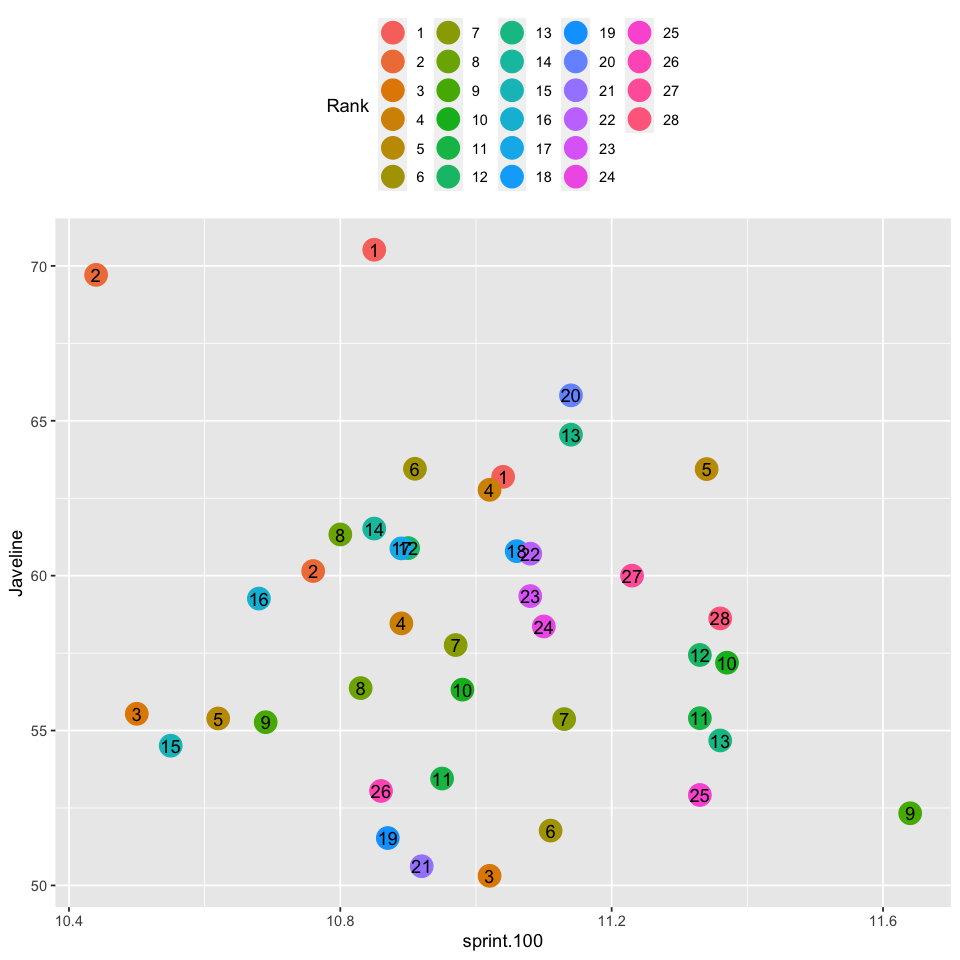

In [19]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(decathlon, aes(x=sprint.100, y=Javeline, color=Rank)) +
  geom_point(size=6) + geom_text( aes(label=Rank), color="black") +
  theme(legend.position="top")

## Curse of dimensionality

Calculate distances in all dimensions for decathlon data and plot the histogram

In [20]:
Distance <-  as.vector(as.matrix( dist(X[,1]) ))
L <- length(Distance)
Dimension <- rep(1, L)
Ndim <- dim(X)[2]
for(n in 2:Ndim){
    Distance <- c(Distance, as.vector(as.matrix( dist(X[,1:n]) )))
    Dimension <- c(Dimension, rep(n, L))
    }

In [21]:
D <- as.data.frame(log(Distance))
colnames(D) <- c("log_distance")
D["dimension"] <- factor(Dimension)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 428 rows containing non-finite values (stat_bin).”


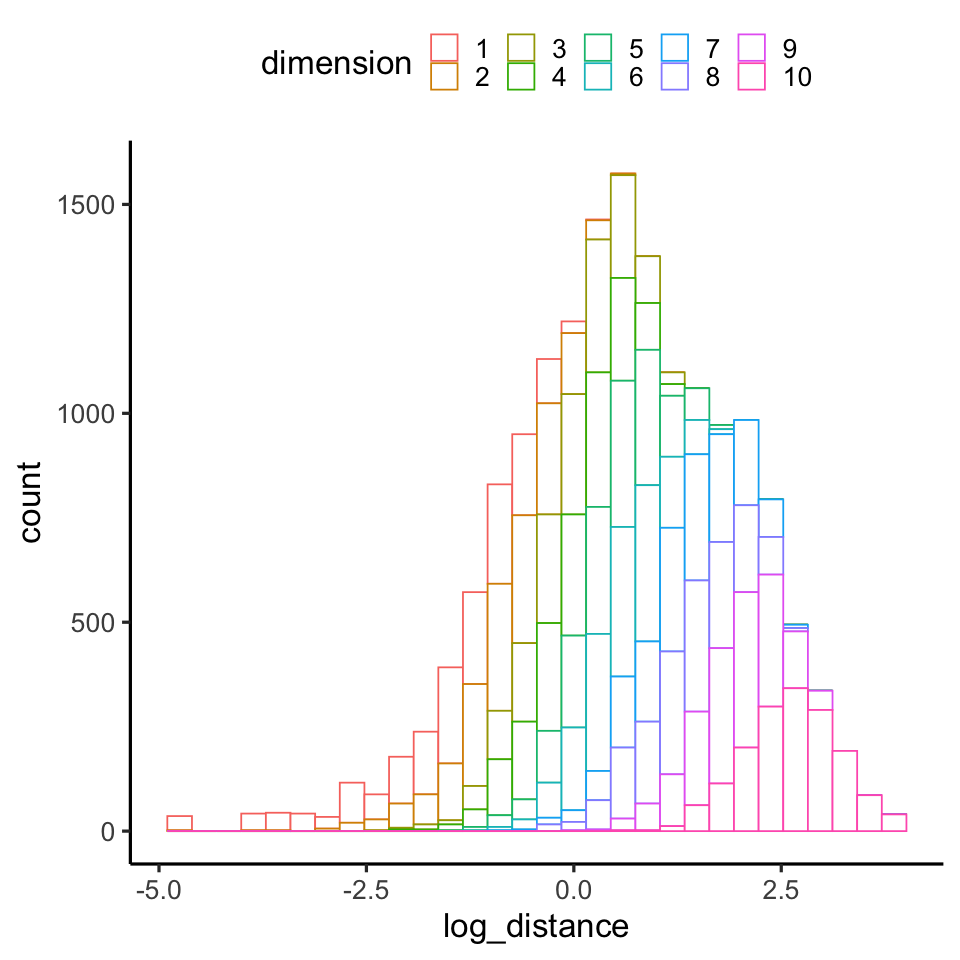

In [22]:
ggplot(D, aes(x=log_distance, color=dimension)) +
  geom_histogram(fill="white") + theme_classic(base_size = 20) +
  theme(legend.position="top")

## Parametric projections

### PCA

The function PCA is part of the package `FactomineR`

In [23]:
PCA = FactoMineR::PCA(X, ncp = 2)

In [24]:
Y_PCA = as.data.frame(PCA$ind$coord)

In [25]:
decathlon <- cbind(decathlon,Y_PCA)

We can already see some type between Ranks.

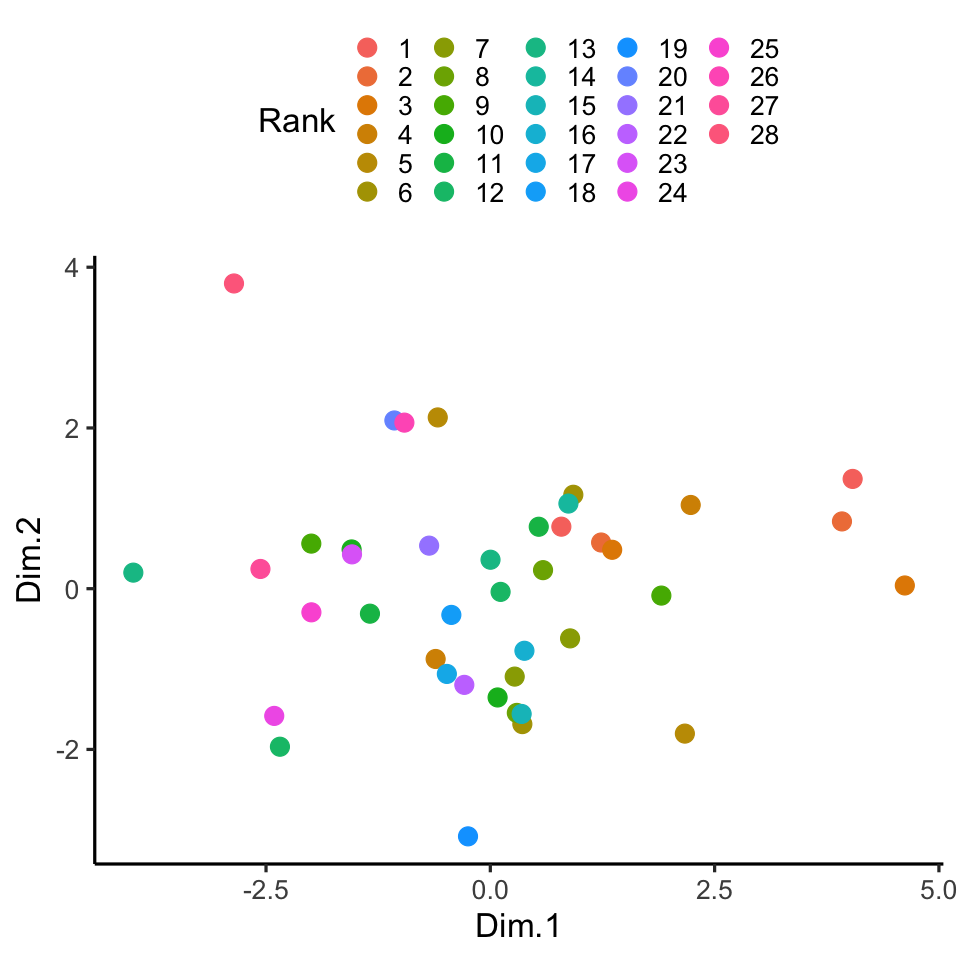

In [26]:
ggplot(decathlon, aes(x=Dim.1, y=Dim.2, color=Rank)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

We can see which sport contributes most to each PC component. The contribution is the cosine between a variable and the PCA axis, expressed as a percentage of the cosine of each variable with that PCA component. PC1 seems mostly related to running sports (most sprints and hurdles), while PC2 has both discus and shot, but also two running sports. Pole vault and javeline are not expressing much contribution in the first two PCs.

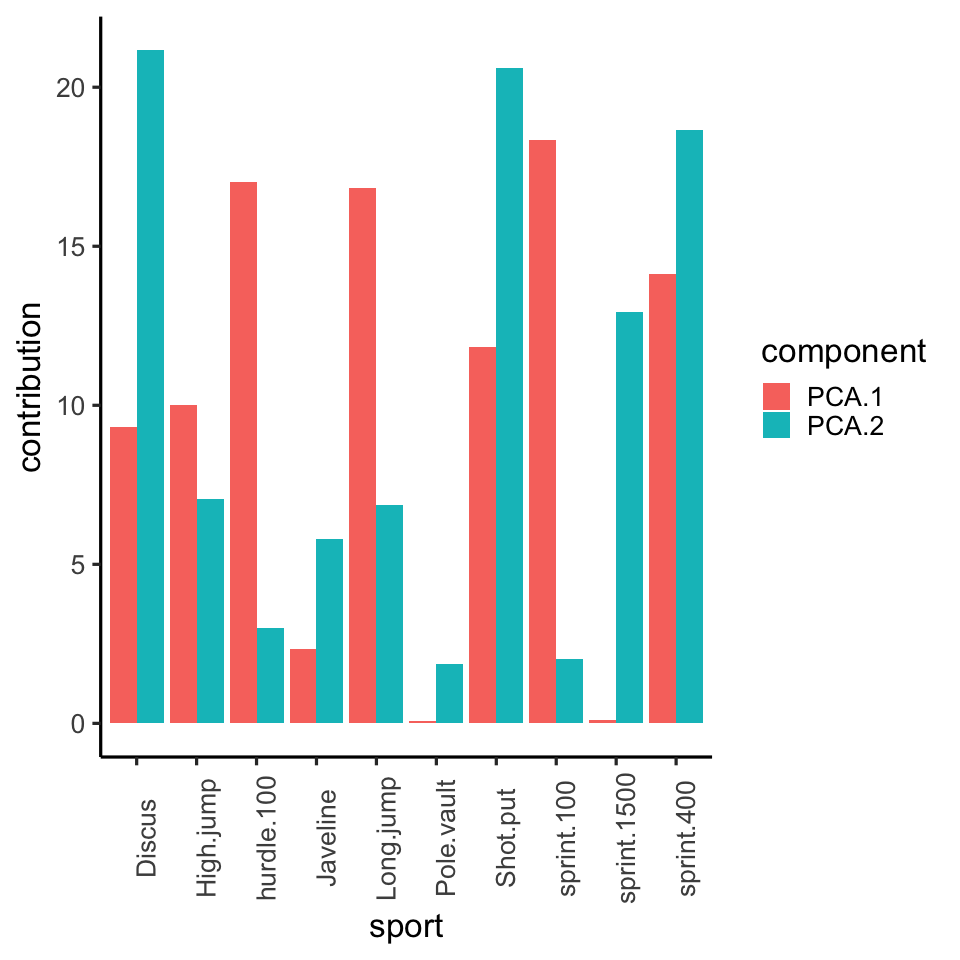

In [27]:
#making a dataframe with contributions for ggplot
contrib <- as.data.frame( c(PCA$var$contrib[,'Dim.1'],PCA$var$contrib[,'Dim.2']) )
contrib[,'component'] <- c(rep( 'PCA.1', dim(contrib)[1]/2 ), rep( 'PCA.2', dim(contrib)[1]/2 ))
contrib[,'sport'] <- rep(rownames(PCA$var$contrib), 2)
colnames(contrib) <- c('contribution','component','sport')

ggplot(contrib, aes(x=sport, y=contribution, fill=component)) +
  geom_bar(stat="identity", position=position_dodge()) + 
  theme_classic(base_size = 20) +
  theme(axis.text.x = element_text(angle = 90))

### Kernel PCA 

is contained in the package `kernlab`. Try out other kernel types beyond the gaussian one. Type `help(kpca)` to see how to use the options. Remember to standardize the data first. other packages do that internally.

In [28]:
X_std = apply(X, 2, function(x){(x-mean(x))/sd(x)})

In [29]:
Y_kpca = kernlab::kpca(as.matrix(X_std), 
     features = 2,
     kernel = "rbfdot", 
     kpar = list(sigma = .01),
     th = 1e-4, 
     na.action = na.omit)

In [30]:
Y_kpca = as.data.frame(Y_kpca@pcv)

In [31]:
colnames(Y_kpca) <- c("KPCA.1","KPCA.2")

In [32]:
decathlon <- cbind(decathlon,Y_kpca)

This is as good as the PCA, but we cannot look at contributions

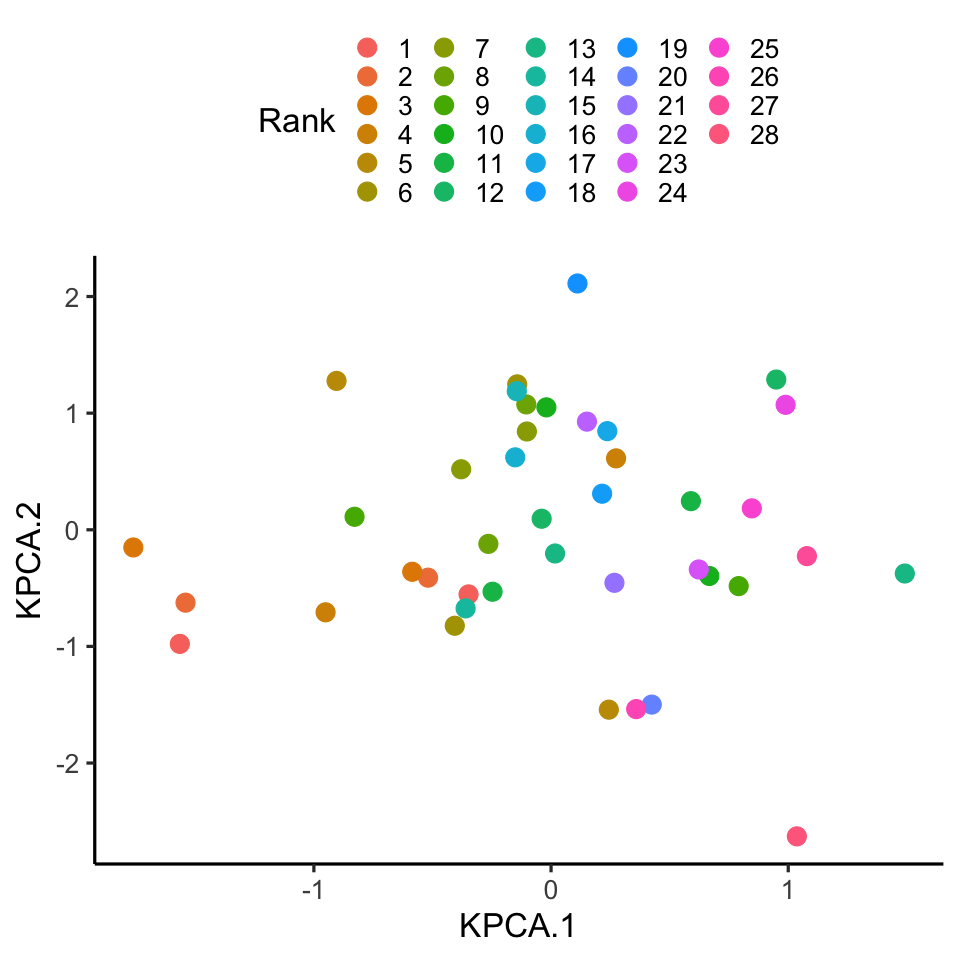

In [33]:
ggplot(decathlon, aes(x=KPCA.1, y=KPCA.2, color=Rank)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

### Linear Discriminant Analysis

contained in the `MASS` package. The functions run a regression based on the projection, so we provide prior probabilities for each class (they give weight to each class). The formula uses `Rank` as the variable giving the label, while we chose the features amongst them giving most contributions in the PCA.

In [34]:
Y_lda <- lda(formula = Rank ~ sprint.100+Long.jump+Shot.put+sprint.400+hurdle.100+Discus+sprint.1500, 
          data = decathlon )

The scalings give for each component the factors in the LD regression for each variable. With those we can see which is the influence of each sport on the components. The changes between `LD1` and `LD2` often resemble the variations in contributions we plotted before for PCA.

In [35]:
Y_lda$scaling

,LD1,LD2,LD3,LD4,LD5,LD6,LD7
sprint.100,1.0373180,-2.18760492,-4.61582451,1.47245508,2.740143206,-1.74903075,-1.66420881
Long.jump,1.0525104,2.20615064,-5.33007033,0.75284176,-1.310506736,-0.08319610,0.56987777
Shot.put,0.2907419,-2.76075636,-0.58787605,0.16012315,0.067561986,-0.20094219,0.33384947
sprint.400,-2.0053682,0.70581359,-0.66563366,-0.88179871,-0.055509440,0.01010410,0.53021716
hurdle.100,2.1277235,0.25566966,0.88526045,0.35183299,-2.466950777,-0.99211106,-0.19668353
Discus,0.4537121,0.55186028,0.15874263,-0.09369414,0.045478352,-0.14308583,0.05041715
sprint.1500,0.1573236,-0.07036443,-0.01093825,-0.03886728,-0.002617911,0.02884453,-0.04852618


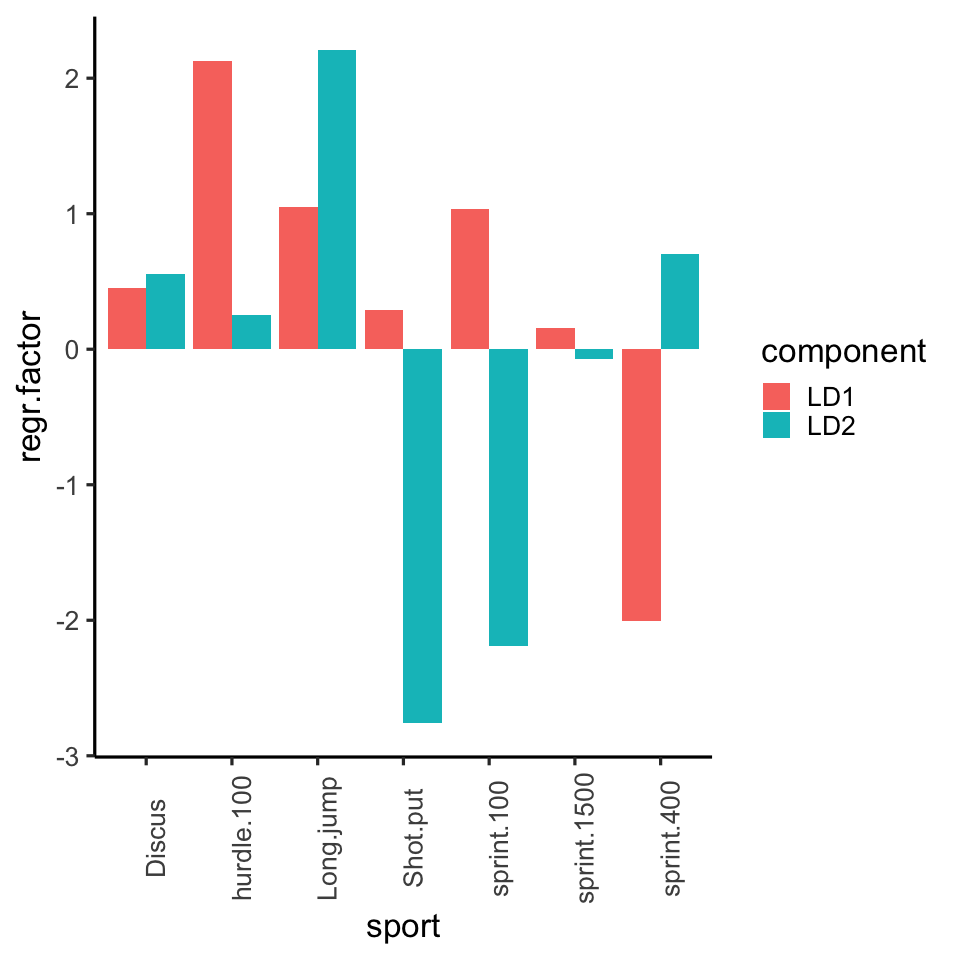

In [36]:
#making a dataframe with LDA factors for ggplot
contrib <- as.data.frame( c(Y_lda$scaling[,'LD1'],Y_lda$scaling[,'LD2']) )
contrib[,'component'] <- c(rep( 'LD1', dim(contrib)[1]/2 ), rep( 'LD2', dim(contrib)[1]/2 ))
contrib[,'sport'] <- rep(rownames(Y_lda$scaling), 2)
colnames(contrib) <- c('regr.factor','component','sport')

ggplot(contrib, aes(x=sport, y=regr.factor, fill=component)) +
  geom_bar(stat="identity", position=position_dodge()) + 
  theme_classic(base_size = 20) +
  theme(axis.text.x = element_text(angle = 90))

We calculate the LDA projections on each axis through the regression, multiplying the data by the coefficients using some good old vectorization in R. First take the coefficients, then multiply by the data and do the sum by rows.

In [37]:
LD <- list()
Ndim <- dim(Y_lda$scaling)[2]
for(n in 1:Ndim){
    coeff_LD <- matrix(rep(Y_lda$scaling[,paste("LD",n,sep="")],dim(X)[1]),
       nrow=dim(X)[1], byrow=T)
    LD[[n]] <- rowSums(X[,rownames(Y_lda$scaling)] * coeff_LD)
}

make a proper dataframe and plot

In [38]:
Y_LDAplot <- data.frame( matrix(unlist(LD),
                    nrow=dim(X)[1],
                    byrow=F) )
colnames(Y_LDAplot) <- sapply( 1:Ndim, function(n) paste("LD",n,sep="") )

In [39]:
decathlon <- cbind(decathlon, Y_LDAplot[,c("LD1","LD2")])

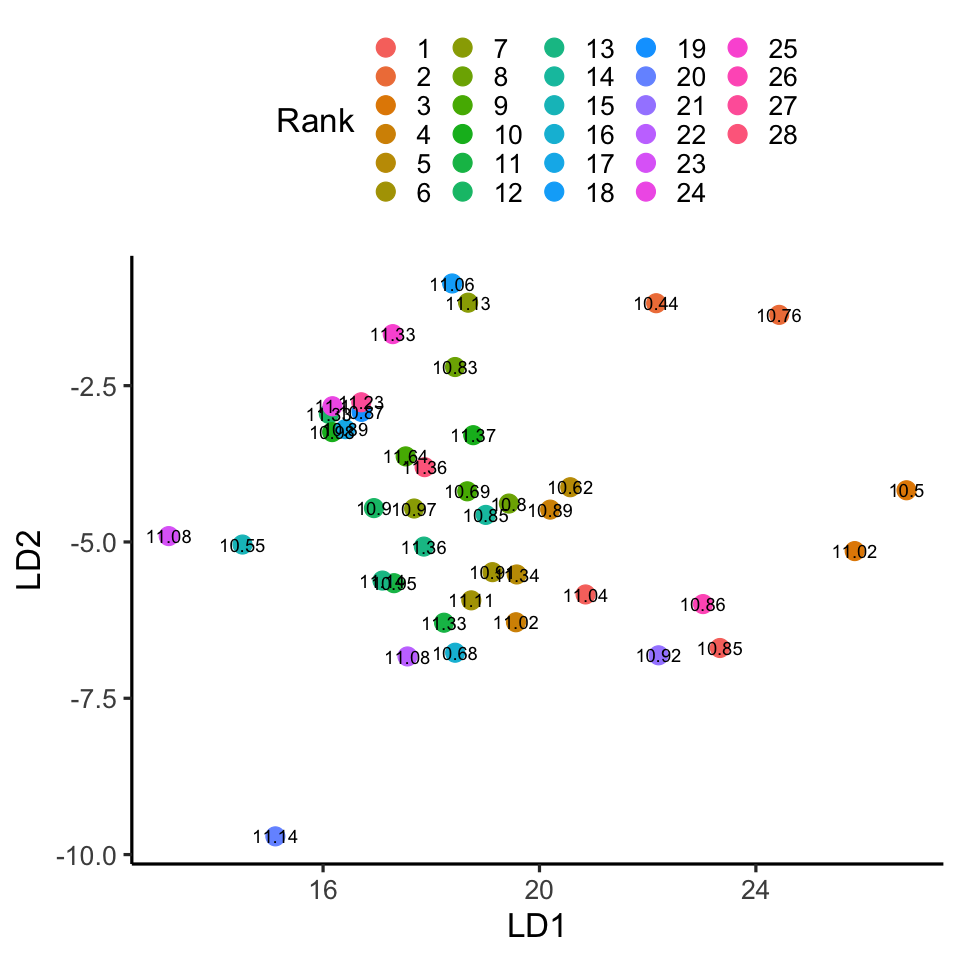

In [40]:
ggplot(decathlon, aes(x=LD1, y=LD2, color=Rank, label=sprint.100)) +
  geom_point(size=5) + 
  geom_text(color="black") +
  theme_classic(base_size = 20) +
  theme(legend.position="top")

## Non-parametric methods

### tSNE

From the code in the book or your own improved code. 

Run your personal tSNE function (in my case `sam_tsne`) or the one from the book (`casl_tsne`). Here `init`, `momentum` and `early_ex` are not options found in `casl_tsne`

In [41]:
Y_tsne <- sam_tsne(X_std[,rownames(Y_lda$scaling)], init = FALSE,
                    momentum=list(init=.8, final=.2, iter=100L),
                    early_ex=list(factor=13, iter=200L), 
                    perplexity = 3, rho=30)

In [42]:
Y_tsne = as.data.frame(Y_tsne)

In [43]:
colnames(Y_tsne) <- c("tSNE1", "tSNE2")

In [44]:
decathlon <- cbind(decathlon,Y_tsne)

tSNE does not really work nicely

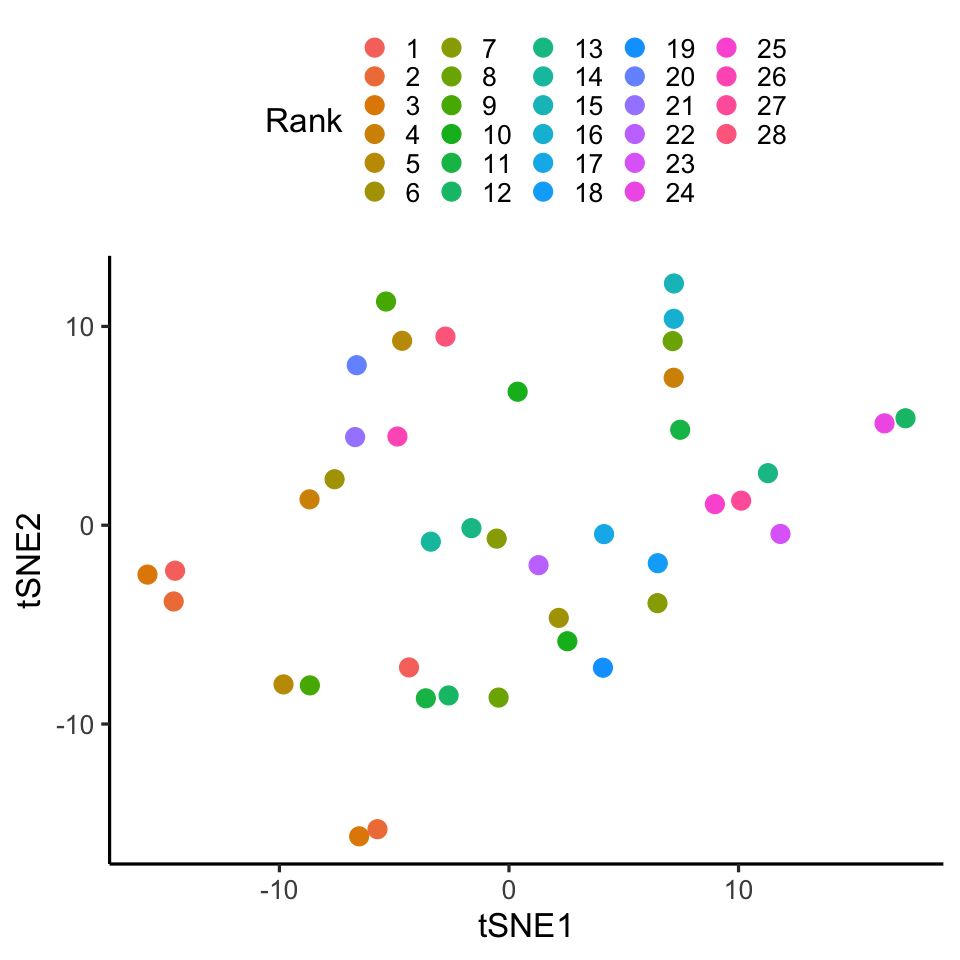

In [45]:
ggplot(decathlon, aes(x=tSNE1, y=tSNE2, color=Rank)) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

#### Benchmarking the tSNEs 

Benchmarking improved tSNE VS tSNE from the book CASL and showing execution time (in seconds)

In [46]:
MB <- microbenchmark("Improved" = { sam_tsne(X_std, init = PCA$ind$coord,
                                    momentum=list(init=.5, final=.9, iter=200L),
                                    early_ex=list(factor=12, iter=200L), 
                                    perplexity = 10, rho=100) },
                     "CASL" =  { casl_tsne(X_std, init = PCA$ind$coord,
                                    perplexity = 20, rho=100) },
                      times=10 )

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



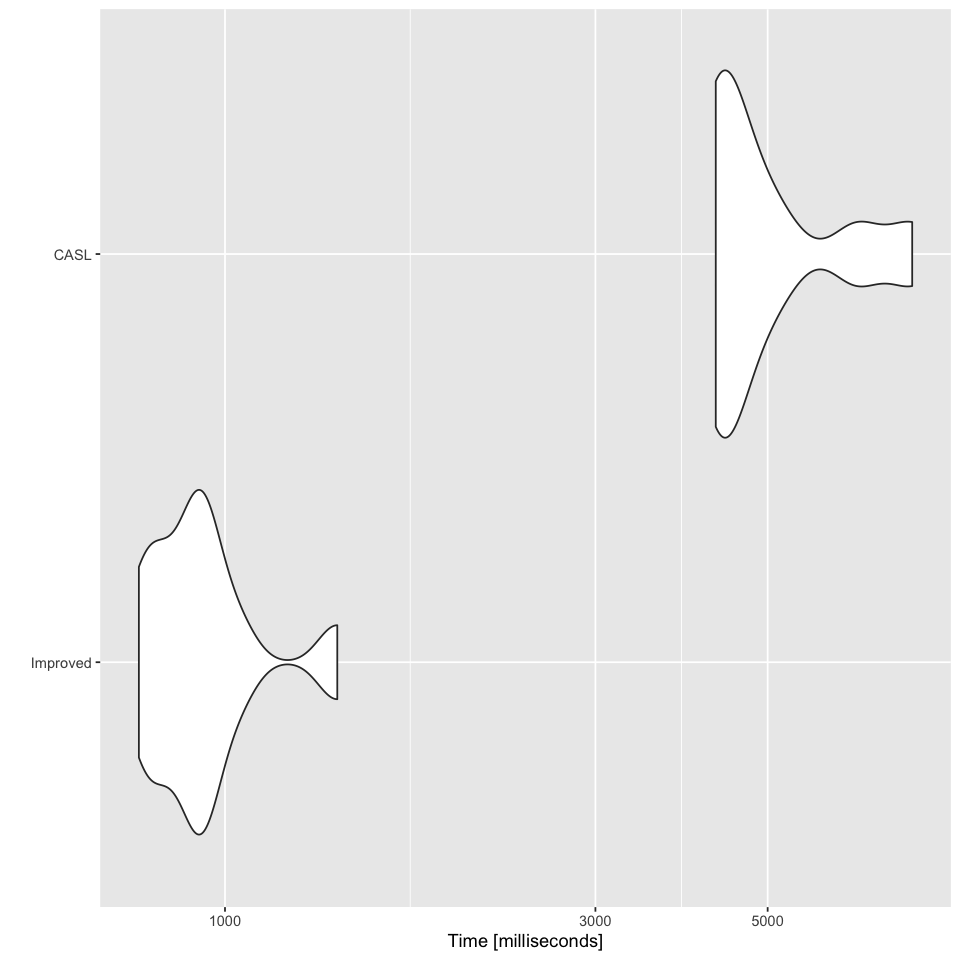

In [47]:
autoplot(MB)

In [48]:
print(MB)

Unit: milliseconds
     expr       min        lq      mean    median        uq      max neval
 Improved  774.5978  818.5487  944.0086  924.4235  950.6744 1395.228    10
     CASL 4286.8090 4333.5107 5047.4953 4496.9718 5191.9299 7676.433    10


### UMAP

part of the package `uwot`. Note the various parameters you can change. `a` and `b` modify the intensity of attractive and repulsive forces.

In [49]:
Y_umap <- uwot::umap(X_std[,rownames(Y_lda$scaling)], n_neighbors = 3, learning_rate = 1, init = "random", a = .7, b=.9)

In [50]:
Y_umap = as.data.frame(Y_umap)

In [51]:
colnames(Y_umap) <- c("UMAP1", "UMAP2")

In [52]:
decathlon <- cbind(decathlon,Y_umap)

UMAP shows some grouping. A cluster is far away from the others, with highly ranking athletes.

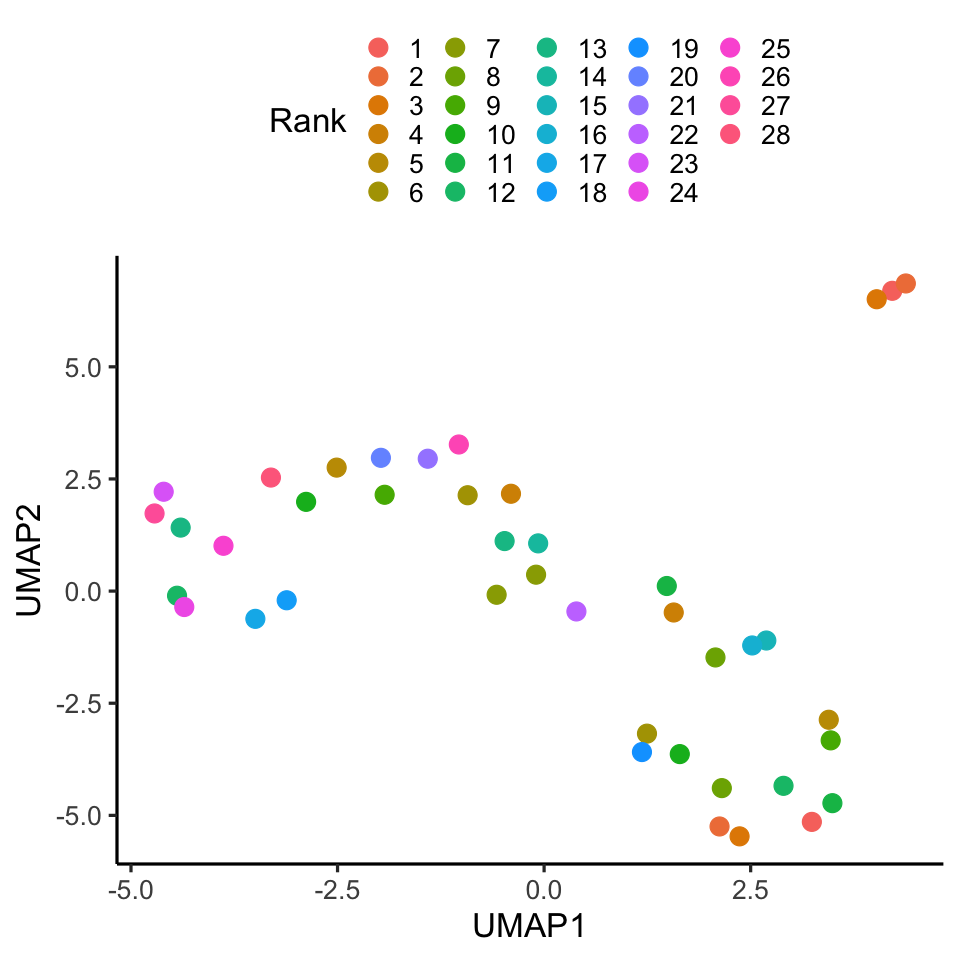

In [53]:
ggplot(decathlon, aes(x=UMAP1, y=UMAP2, color=Rank )) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

Only the small cluster has clearly more points than the others

------------

## Clustering

We try some clustering on a projection of the data and see the different methods available

### k-means clustering

We start with k-means clustering on the Umap. Here you need to choose the parameter k (centers). Let's say we choose 5.

In [54]:
set.seed(123)
proj <- decathlon[,c("UMAP1","UMAP2")]
res <- stats::kmeans(x=proj, centers=5)

In [55]:
print(res)

K-means clustering with 5 clusters of sizes 13, 2, 1, 14, 11

Cluster means:
      UMAP1     UMAP2
1 -0.419131  1.330017
2  4.295938  6.776226
3  4.025471  6.506302
4  2.466836 -3.550860
5 -3.791305  1.123915

Clustering vector:
     SEBRLE        CLAY      KARPOV     BERNARD      YURKOV     WARNERS 
          4           4           4           1           5           4 
  ZSIVOCZKY    McMULLEN   MARTINEAU       HERNU      BARRAS        NOOL 
          1           4           1           5           1           5 
BOURGUIGNON      Sebrle        Clay      Karpov       Macey     Warners 
          5           2           2           3           1           4 
  Zsivoczky       Hernu        Nool     Bernard    Schwarzl   Pogorelov 
          1           1           4           4           4           4 
 Schoenbeck      Barras       Smith   Averyanov    Ojaniemi     Smirnov 
          4           1           1           4           4           5 
         Qi       Drews Parkhomenko      

In [56]:
Y_kmeans <- cbind(factor(res$cluster), Y_umap)

In [57]:
names(Y_kmeans)[1] <- "Clusters" 

The plot seems ok, but some clusters are weird, especially because there is one cluster with just one point.

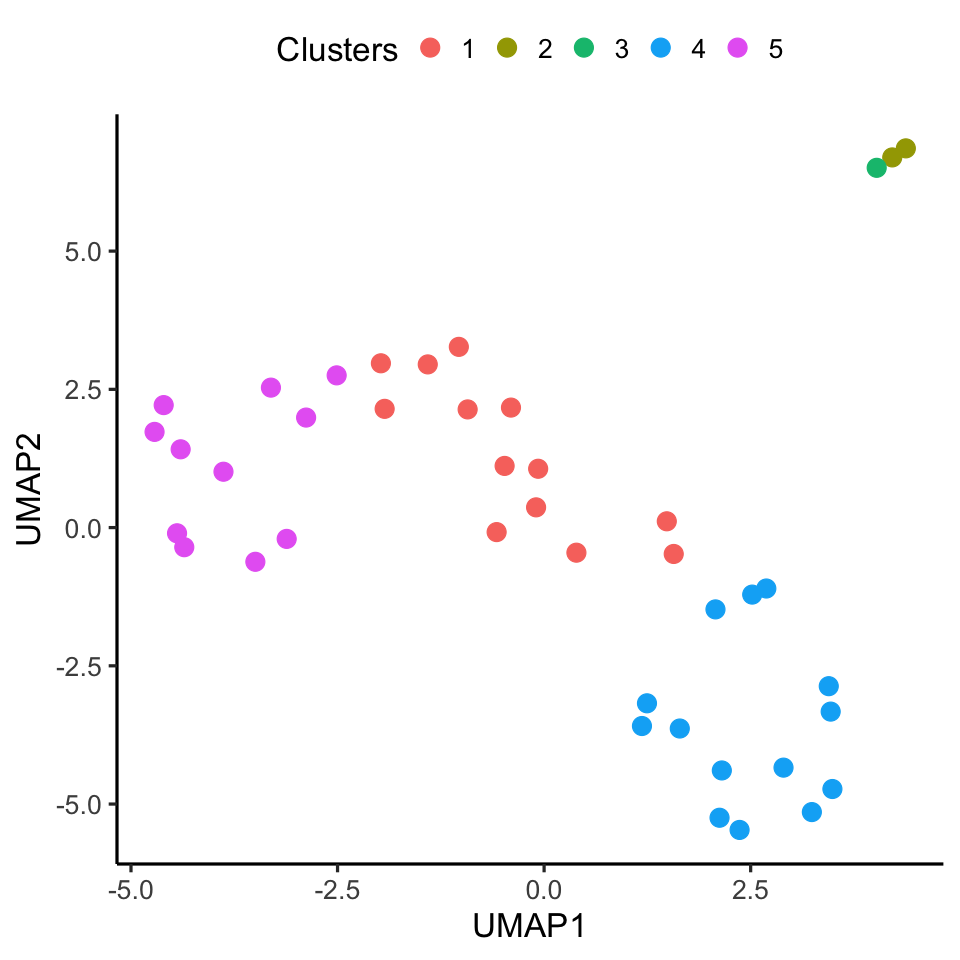

In [58]:
ggplot(Y_kmeans, aes(x=UMAP1, y=UMAP2, color=Clusters, )) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

#### A way of selecting k

We define the sum of the squared distances within clusters as a criteria to choose k. The total of squared distances within clusters is already provided by the kmeans algorithm. We define a function that provides the value and run it for various k's, and plot the extracted values. When there is a clear choice of k, it is possible to see the elbow of the plot. In this case one would say k=5 is a good choice, but we saw how it did not give nice results.

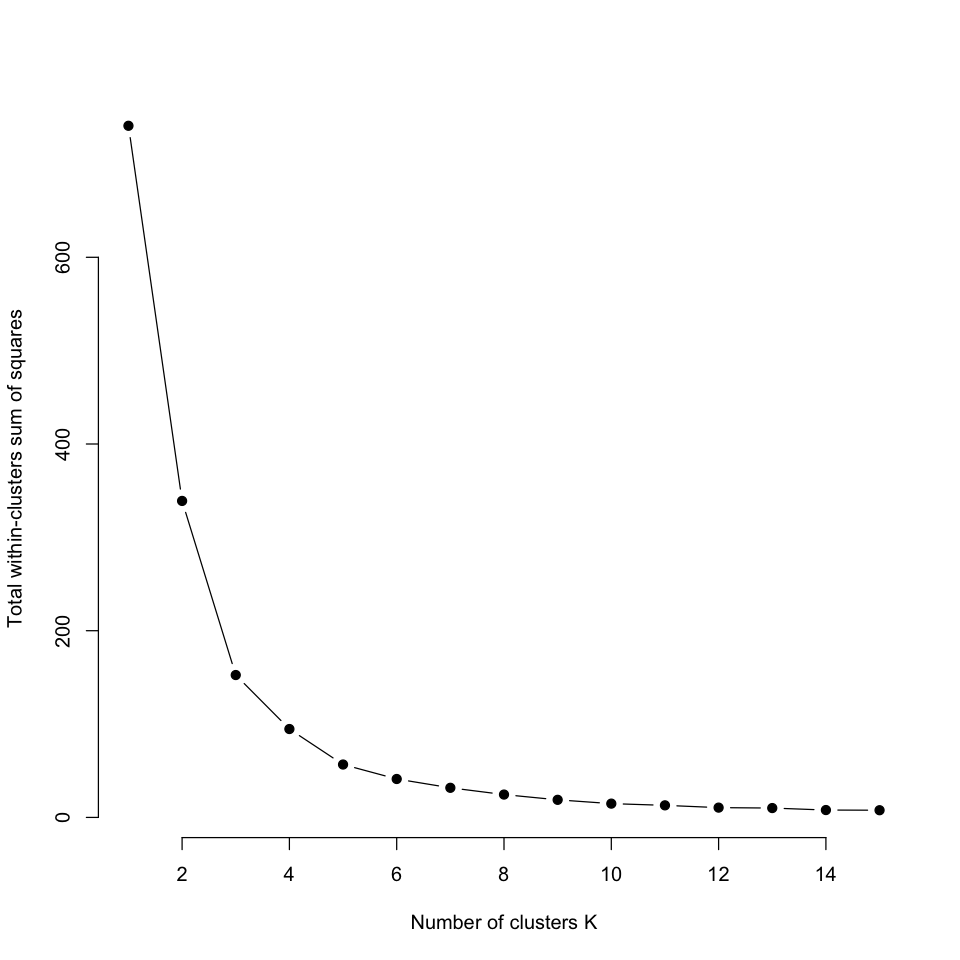

In [59]:
# function to compute total within-cluster sum of square 
wss <- function(k) 
  kmeans(proj, k, nstart = 10 )$tot.withinss

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 1-15 clusters
wss_values <- sapply(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

### Hierarchical clustering

To do hierarchical clustering you need the package `fastcluster`. This has all implementations running in $N^2$ time, that is [much faster than the many $N^3$ implementations of most packages](http://danifold.net/fastcluster.html?section=1#performance).

Let's try the hierarchical clustering on our data. Here you can change the method of linkage and see what happens. Use `help(fastcluster::hclust)` to see which methods you can use.

In [60]:
res_hclust <- fastcluster::hclust(dist(proj), method = "single" )

Let's look at the dendrogram. Here we can see again at three athletes that are separating already when inertia (height) is very high. We can see then some branchings that have some visible inertia gap. One could choose a threshold when the inertia is just below 2 (red line), and consider that there are only 3 clusters, since all the others are created in small intervals of inertia.

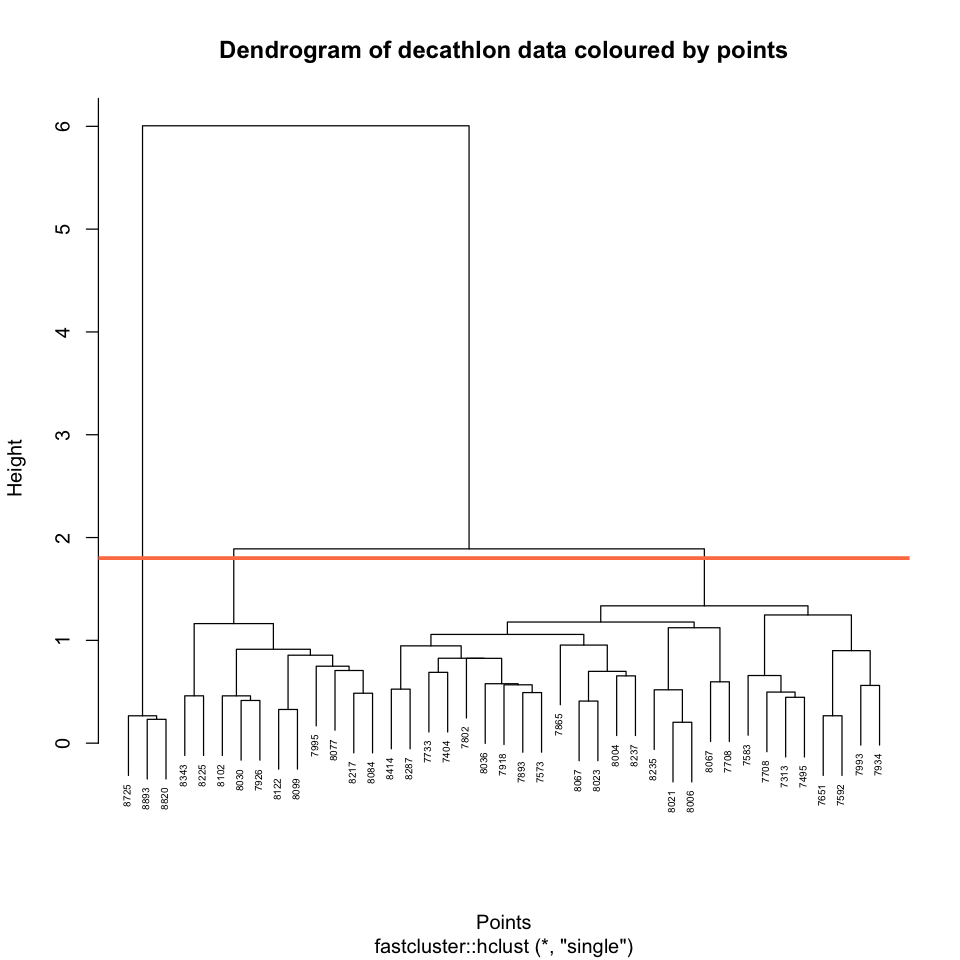

In [62]:
plot(x = res_hclust, labels = decathlon[,"Points"], cex = 0.5,
    xlab="Points", main="Dendrogram of decathlon data coloured by points")
abline(h=1.8, col="coral", lwd=3)

we create a dataframe where we use `cutree` to cut the tree to have 4 clusters, and plot those clusters on our UMAP.

In [63]:
H_k <- 3 #choose nr of clusters

In [64]:
Y_tree <- as.data.frame(factor(cutree(res_hclust,H_k)))
colnames(Y_tree) <- c("H_clusters")

In [65]:
decathlon <- cbind(decathlon, Y_tree)

This makes definitely more sense.

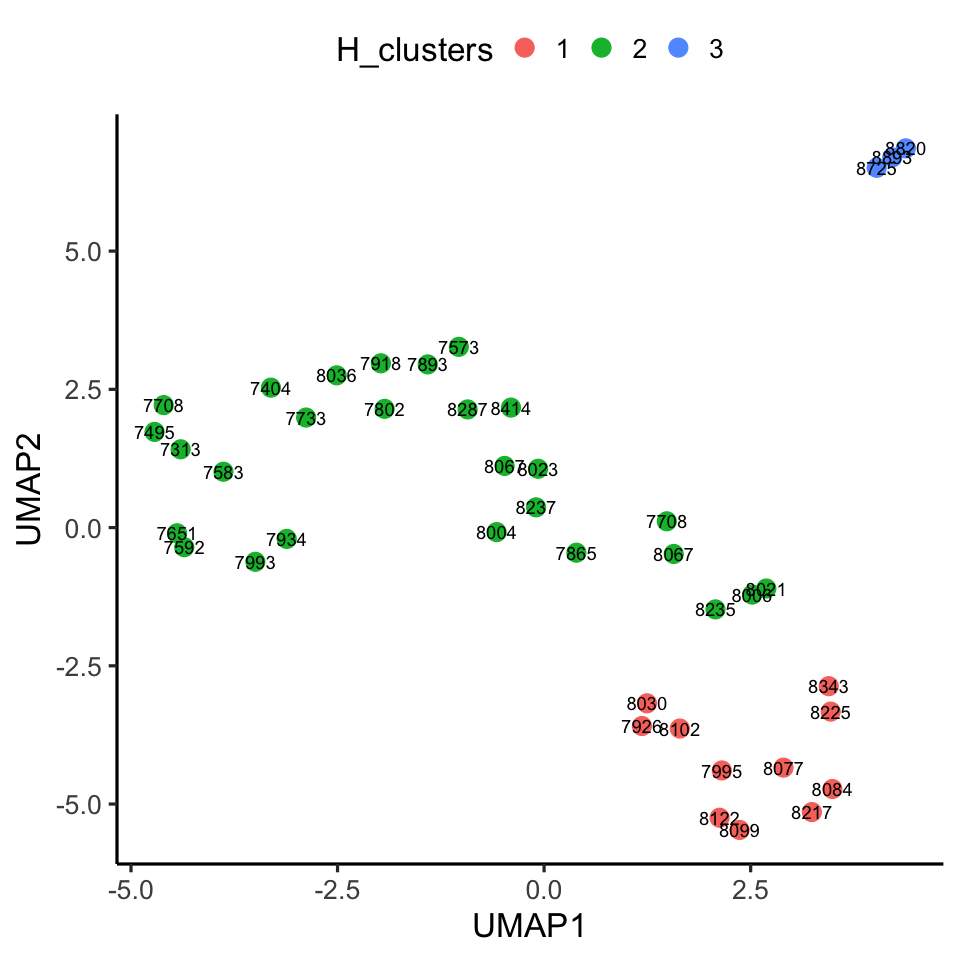

In [66]:
ggplot(decathlon, aes(x=UMAP1, y=UMAP2, color=H_clusters, label=Points )) +
  geom_point(size=5) + 
  geom_text(col="black") +
  theme_classic(base_size = 20) +
  theme(legend.position="top")

Where would the 4th cluster had been created?

In [67]:
H_k <- 4 #choose nr of clusters

In [68]:
Y_tree <- as.data.frame(factor(cutree(res_hclust,H_k)))
colnames(Y_tree) <- c("H_clusters_4")

In [69]:
decathlon <- cbind(decathlon, Y_tree)

The large cluster was split in two

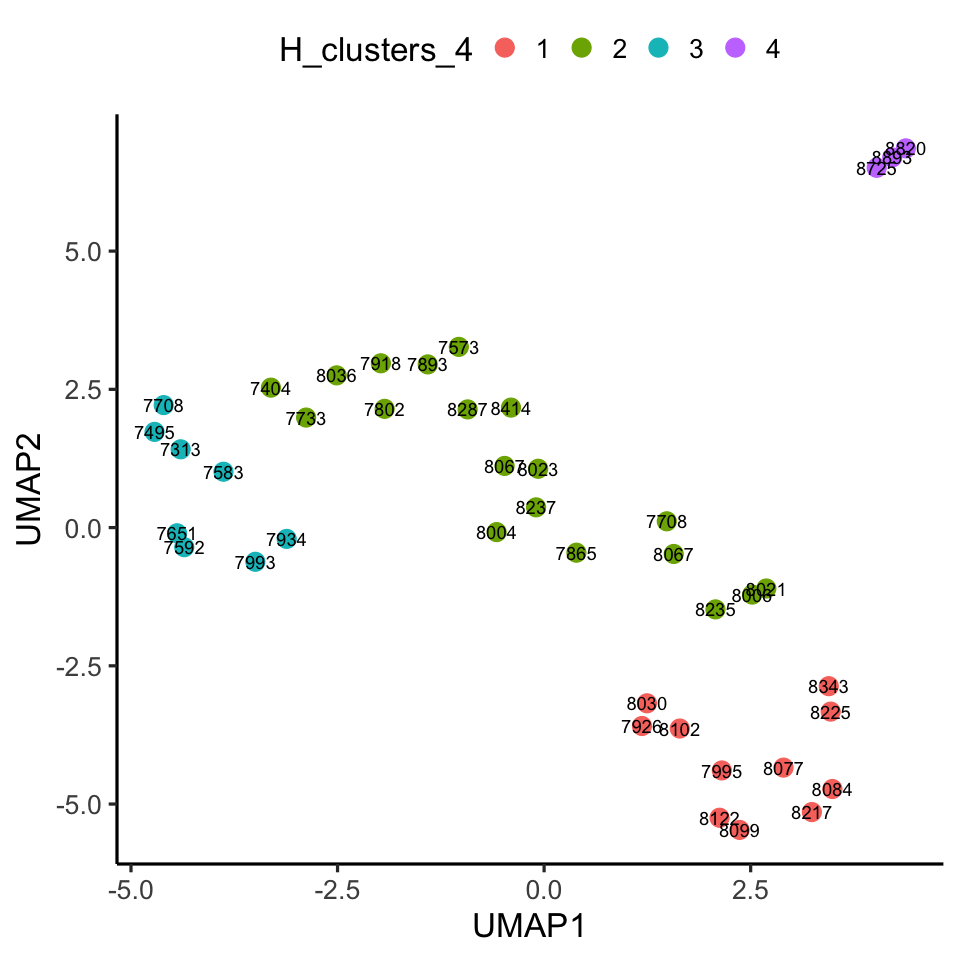

In [70]:
ggplot(decathlon, aes(x=UMAP1, y=UMAP2, color=H_clusters_4, label=Points )) +
  geom_point(size=5) + 
  geom_text(col="black") +
  theme_classic(base_size = 20) +
  theme(legend.position="top")

We got a subcluster on the left now, separated from the large one. You can look at a range of variables that might be interesting.

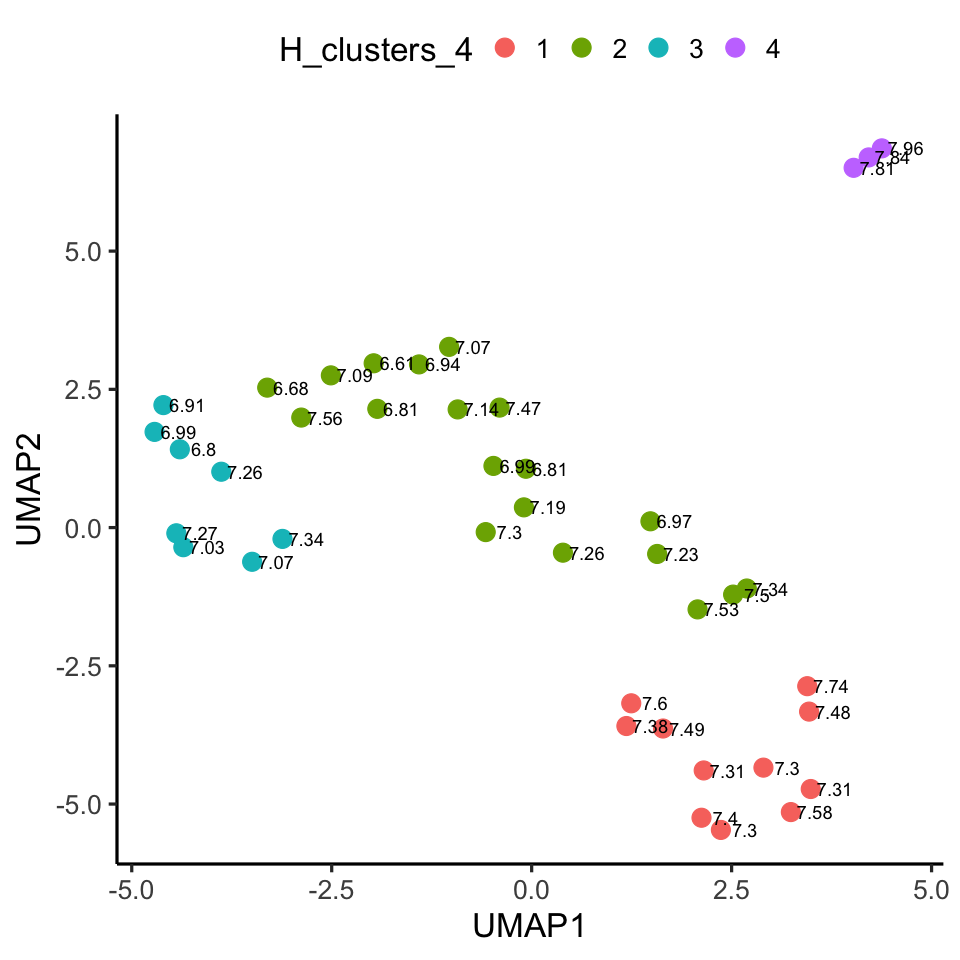

In [71]:
ggplot(decathlon, aes(x=UMAP1, y=UMAP2, color=H_clusters_4, label=Long.jump )) +
  geom_point(size=5) + 
  geom_text(col="black", nudge_x = .3) +
  theme_classic(base_size = 20) +
  theme(legend.position="top")

What happens with the complete linkage?

In [72]:
res_hclust <- fastcluster::hclust(d = dist(proj), method = "complete" )

The tree is very different, with large inertial gaps. Cutting at inertia 7 gives four clusters.

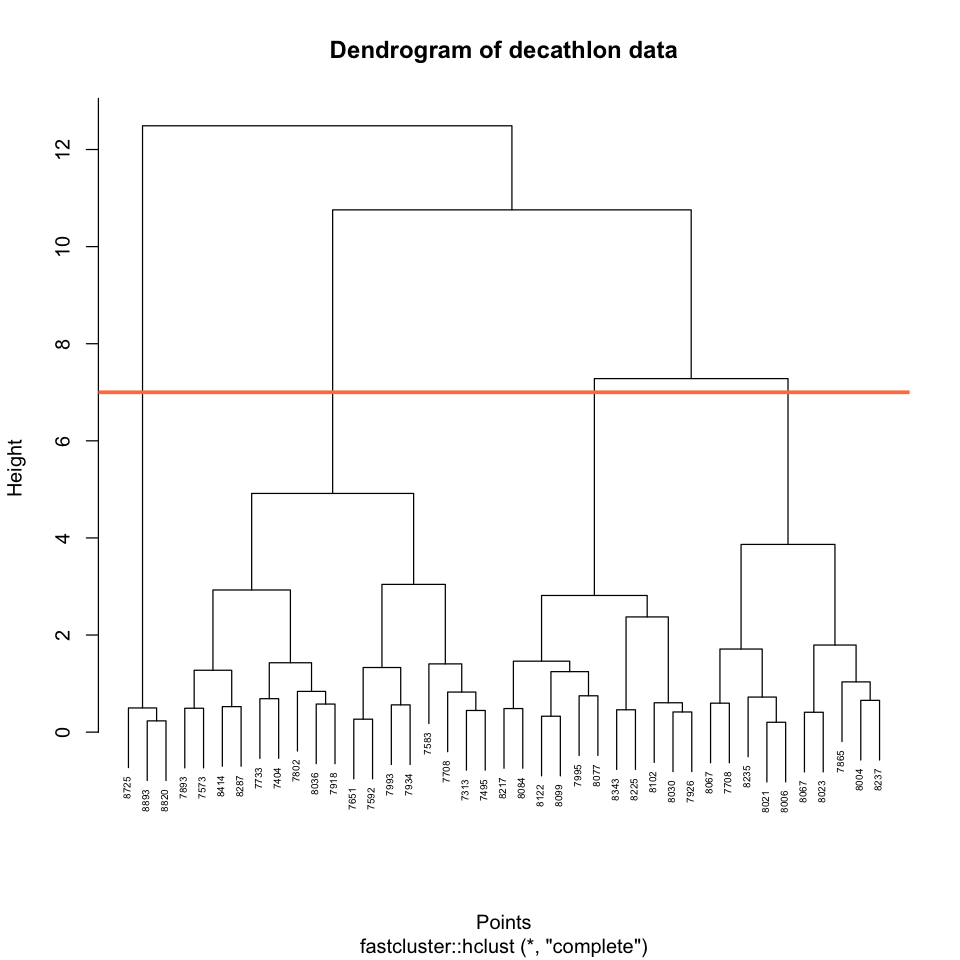

In [73]:
plot(x = res_hclust, labels = decathlon[,"Points"], cex = 0.5,
    xlab="Points", main="Dendrogram of decathlon data")
abline(h=7, col="coral", lwd=3)

In [74]:
H_k <- 4 #choose nr of clusters

In [75]:
Y_tree <- as.data.frame(factor(cutree(res_hclust,H_k)))
colnames(Y_tree) <- c("H_clusters_4_complete")

In [76]:
decathlon <- cbind(decathlon, Y_tree)

But those are different from the ones with single linkage!

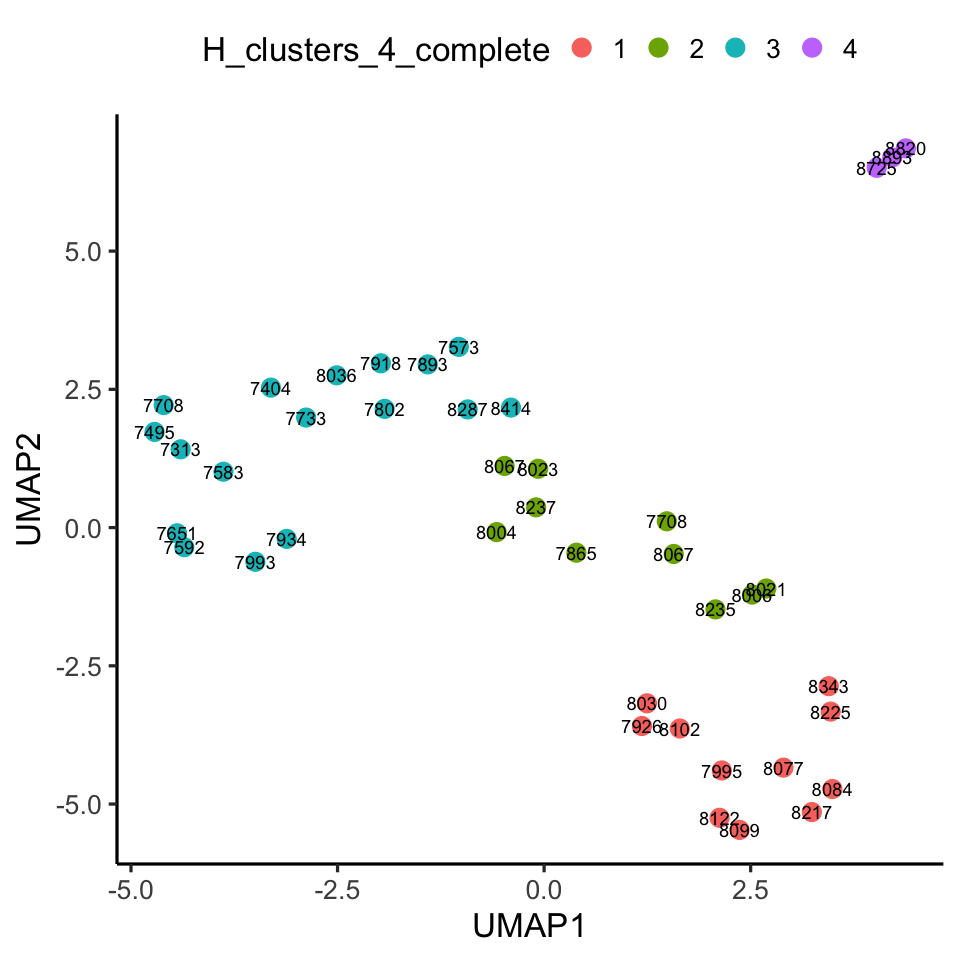

In [77]:
ggplot(decathlon, aes(x=UMAP1, y=UMAP2, color=H_clusters_4_complete, label=Points )) +
  geom_point(size=5) + 
  geom_text(col="black") +
  theme_classic(base_size = 20) +
  theme(legend.position="top")

you can highlight the clusters in your dendrogram.

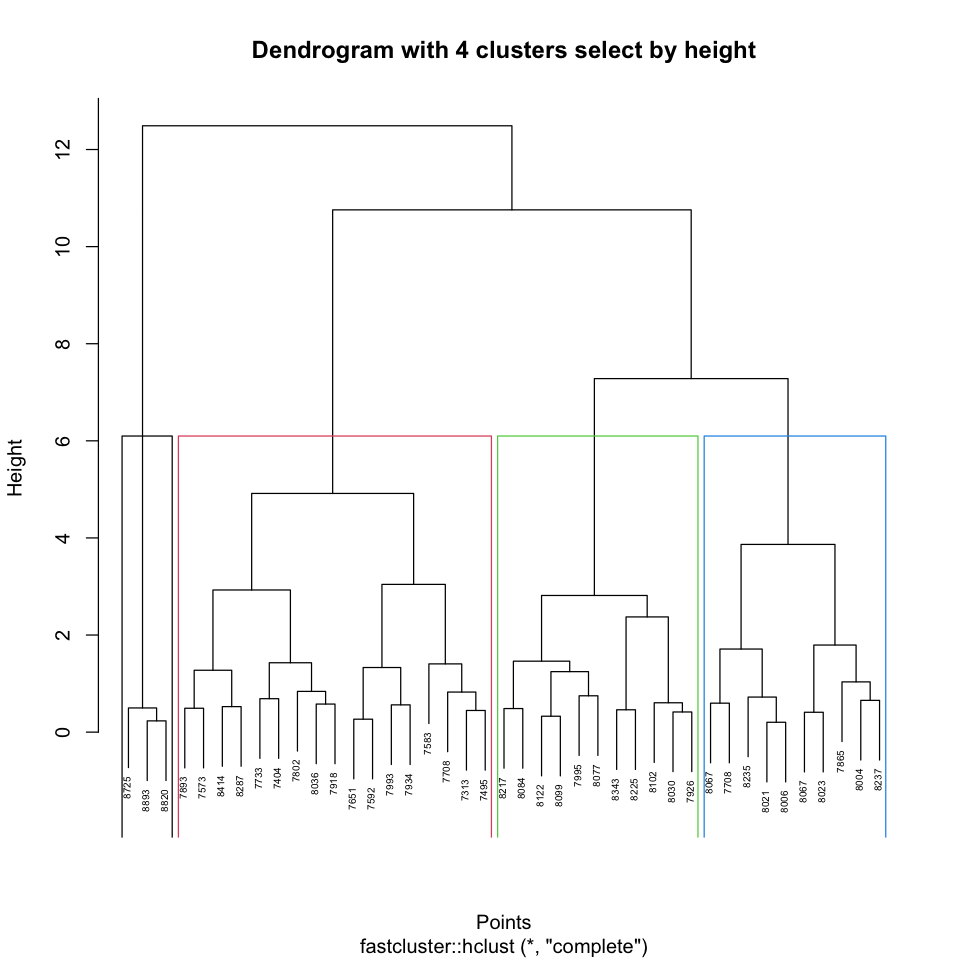

In [78]:
cl_members <- cutree(tree = res_hclust, k = H_k)
plot(x = res_hclust, labels = decathlon[,"Points"], cex = 0.5,
    xlab="Points", main="Dendrogram with 4 clusters select by height")
rect.hclust(tree = res_hclust, k = H_k, which = 1:H_k, 
            border = 1:H_k, cluster = cl_members)

#### Can you use some of this on the k-means?

We can choose k with the hierarchical method above. Or even better, give the centroids of the clusters we found. In this case it does not make much sense because we have a tiny dataset, but the practical application is usually

- Try hierarchical clustering on a small subset of data.
- find k or centroids
- apply those to the full dataset with k-means

We make a matrix of centroids

In [79]:
centroids <- matrix(0, nrow = H_k, ncol = 2)
for(cl in unique(cl_members))
    centroids[cl,] <- colMeans( decathlon[cl_members==cl,c("UMAP1","UMAP2")] ) 

and run the k-means

In [80]:
res <- stats::kmeans(x=proj, centers=centroids)

In [81]:
km <- as.data.frame(factor(res$cluster))
colnames(km) <- "kmeans_initialized"

In [82]:
decathlon <- cbind(decathlon, km)

The results matches a lot what we got with the hierarchical clustering, but it has small differences

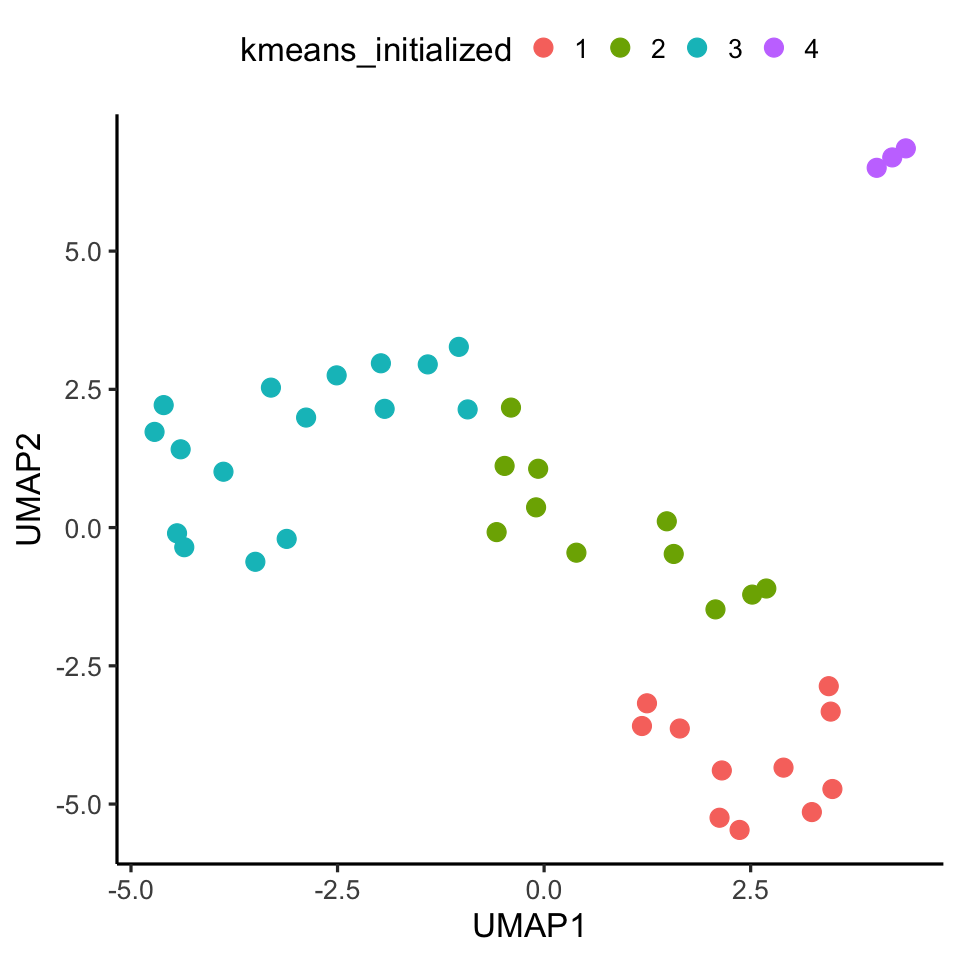

In [83]:
ggplot(decathlon, aes(x=UMAP1, y=UMAP2, color=kmeans_initialized, )) +
  geom_point(size=5) + 
  theme_classic(base_size = 20) +
  theme(legend.position="top")

### Density clustering

This is available as part of the package `dbscan`, together with its hierarchical improvement. DBSCAN requires an `eps` parameter, which reduces the number of clusters by increasing the distance at which a cluster spans to. Also, you need to specify the minimum number of points per cluster. DBSCAN will also find points that are noisy, i.e. are not in an area dense with data. Try various values to see the results.

In [84]:
res_dbscan <- dbscan::dbscan(x=proj, eps=1.3, minPts = 2)
print(res_dbscan)

DBSCAN clustering for 41 objects.
Parameters: eps = 1.3, minPts = 2
Using euclidean distances and borderpoints = TRUE
The clustering contains 4 cluster(s) and 0 noise points.

 1  2  3  4 
11 19  8  3 

Available fields: cluster, eps, minPts, dist, borderPoints


In [85]:
db <- as.data.frame(factor(res_dbscan$cluster))
colnames(db) <- "Clusters_dbscan"

In [86]:
decathlon <- cbind(decathlon, db)

The way of identifying cluster gcan give a different result compared to hierarchical methods.

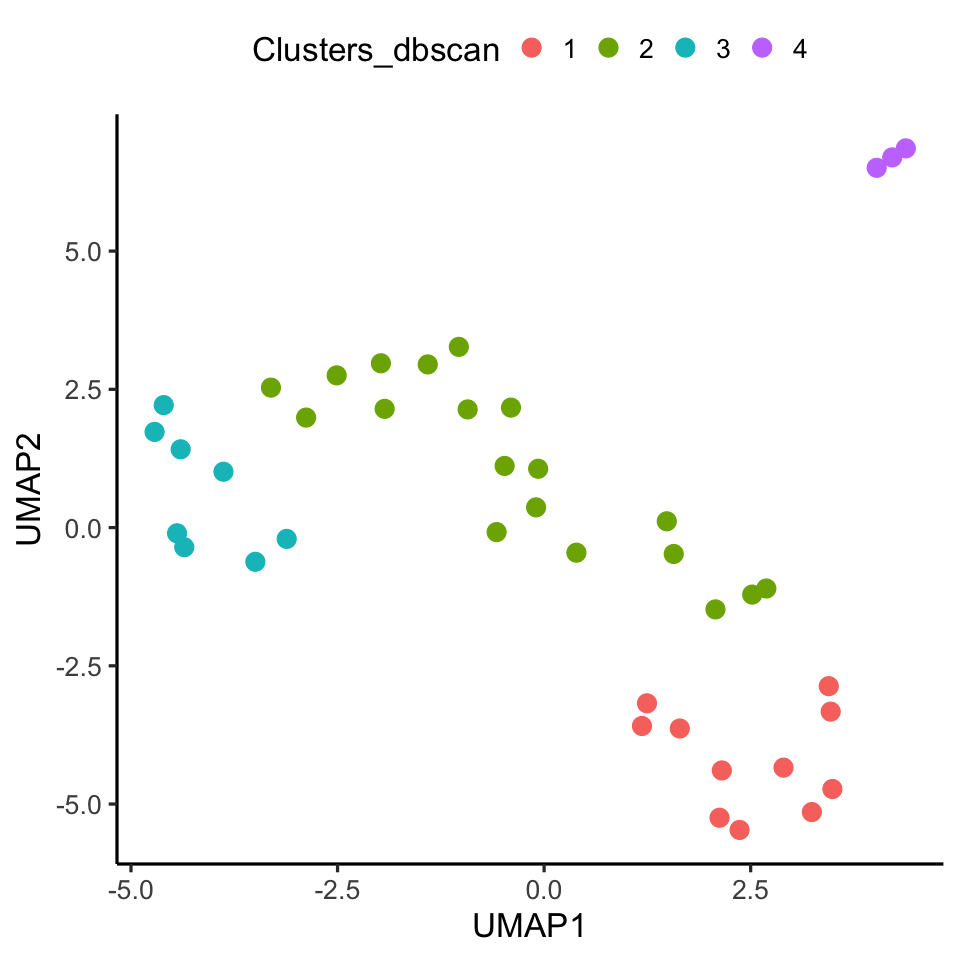

In [87]:
ggplot(decathlon, aes(x=UMAP1, y=UMAP2, color=Clusters_dbscan, )) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

HDBSCAN is a change of DBSCAN that applies hierarchical clustering so that the `eps` parameter is removed. From before we think that each cluster must have three points.

In [88]:
res_hdbscan <- dbscan::hdbscan(x=proj, minPts = 3)
res_hdbscan

HDBSCAN clustering for 41 objects.
Parameters: minPts = 3
The clustering contains 7 cluster(s) and 2 noise points.

 0  1  2  3  4  5  6  7 
 2  3  3  4  8  6  4 11 

Available fields: cluster, minPts, coredist, cluster_scores,
                  membership_prob, outlier_scores, hc

In [89]:
db <- as.data.frame(factor(res_hdbscan$cluster))
colnames(db) <- "Clusters_hdbscan"

In [90]:
decathlon <- cbind(decathlon, db)

This is a clustering identifying two noise points (cluster 0)

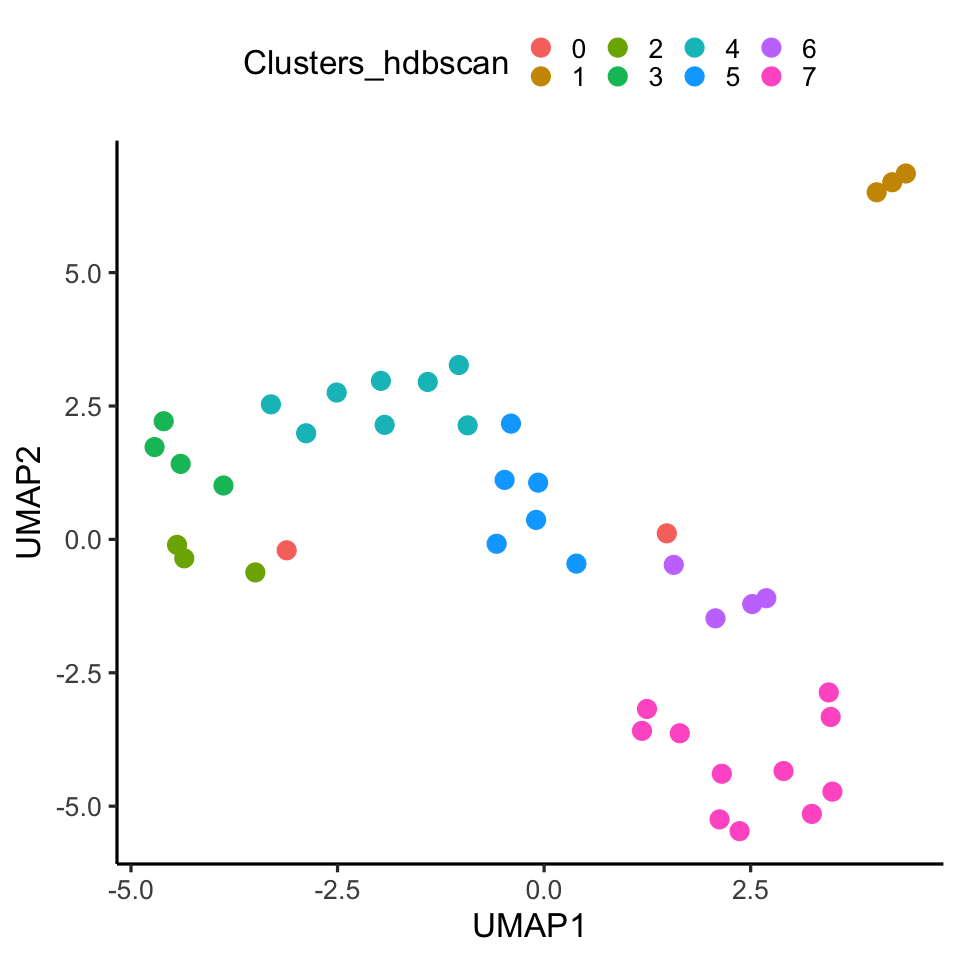

In [91]:
ggplot(decathlon, aes(x=UMAP1, y=UMAP2, color=Clusters_hdbscan, )) +
  geom_point(size=5) + theme_classic(base_size = 20) +
  theme(legend.position="top")

### Spectral clustering implementation

In [936]:
spectr_k <- 2
Kdist <- kNN(scale(proj), k=spectr_k)
Kdist_idx <- Kdist$id
Kdist_D <- exp(-Kdist$dist^2)
A <- matrix(0, nrow=nrow(proj), ncol=nrow(proj))
for(i in 1:nrow(proj)) #add neighbours of point i
    A[i, Kdist_idx[i,]] <- Kdist_D[i,]
for(i in 1:nrow(proj)) #add distances having i in neighbourhood
    A[i, -Kdist_idx[i,]] <- A[ -Kdist_idx[i,], i]

In [937]:
#A <- exp(-as.matrix(dist(proj))^2)
#diag(A) <- 0

In [938]:
D <- diag(rowSums(A))

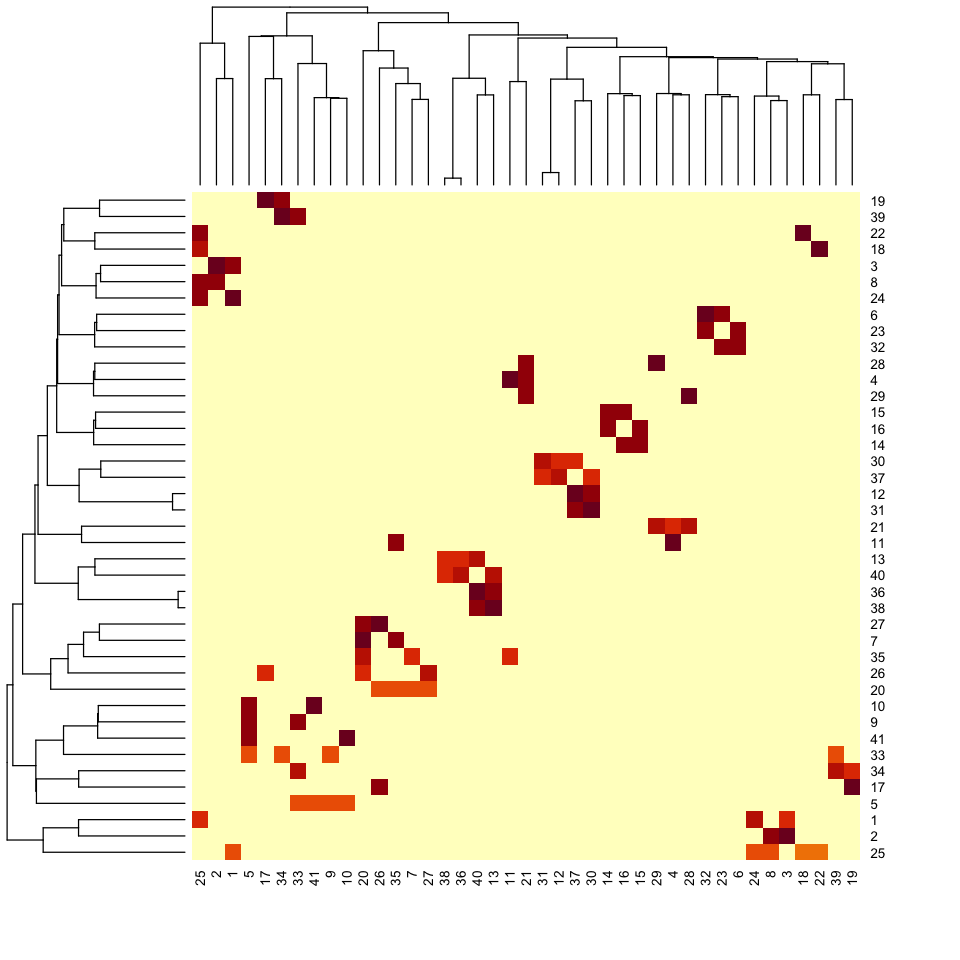

In [939]:
heatmap(A)

In [940]:
L <- D-A

In [941]:
kappa(L) #large condition number

[1] 3.168234e+19

In [942]:
D[D==0] <- .Machine$longdouble.eps
D2 <- sqrt(D)

In [943]:
Lsym <- (1/D2^2) %*% L

In [944]:
kappa(Lsym)

[1] 2.988588e+18

In [969]:
svd_L <- svd(L)

In [970]:
U <- svd_L$u[,((ncol(L) - 5 + 1):ncol(L))]

In [971]:
Unorm <- t(apply(U, 1, function(x) x/sum(x)))

In [972]:
res <- stats::kmeans(x=Unorm, centers=4)
#res <- hdbscan(x=Unorm, minPts = 3)

In [973]:
res <- as.data.frame(factor(res$cluster))
colnames(res) <- c("spectral_clusters")

In [974]:
decathlon <- decathlon[,!colnames(decathlon) %in% c("spectral_clusters")]
decathlon <- cbind(decathlon, res)

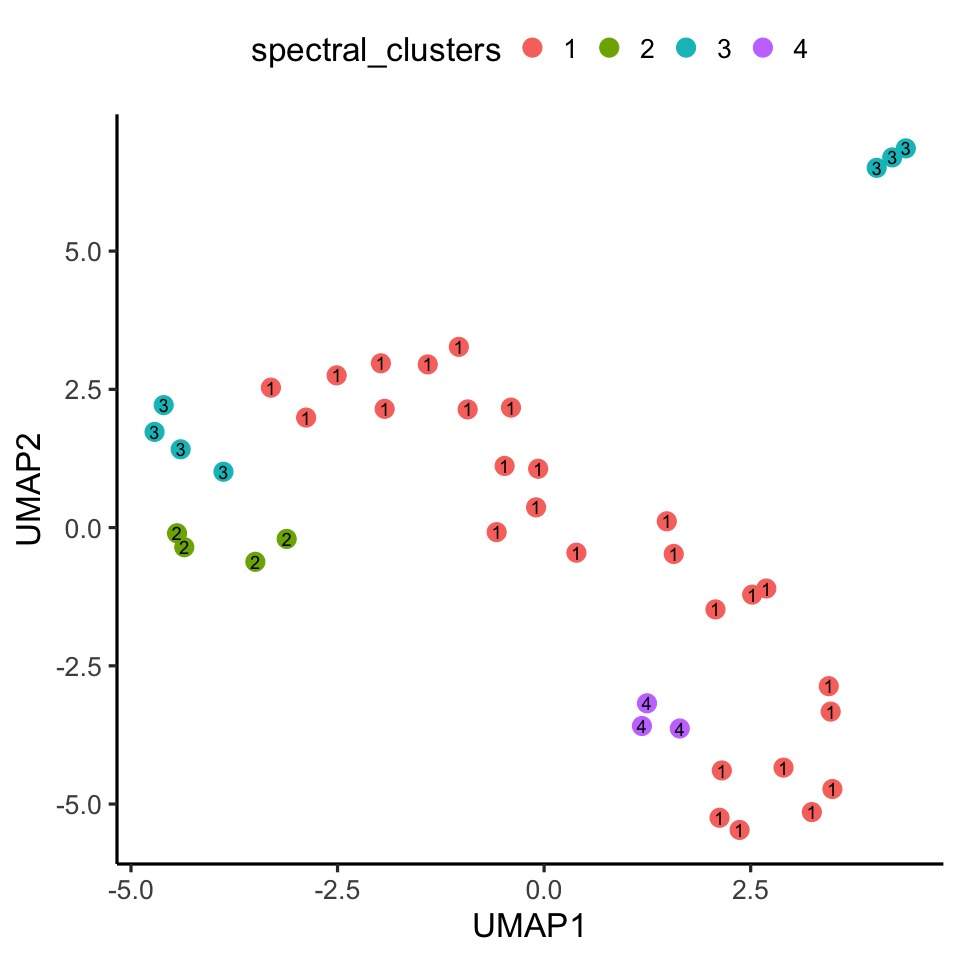

In [975]:
ggplot(decathlon, aes(x=UMAP1, y=UMAP2, color=spectral_clusters, label=spectral_clusters )) +
  geom_point(size=5) + geom_text(color="black") +
 theme_classic(base_size = 20) +
  theme(legend.position="top")

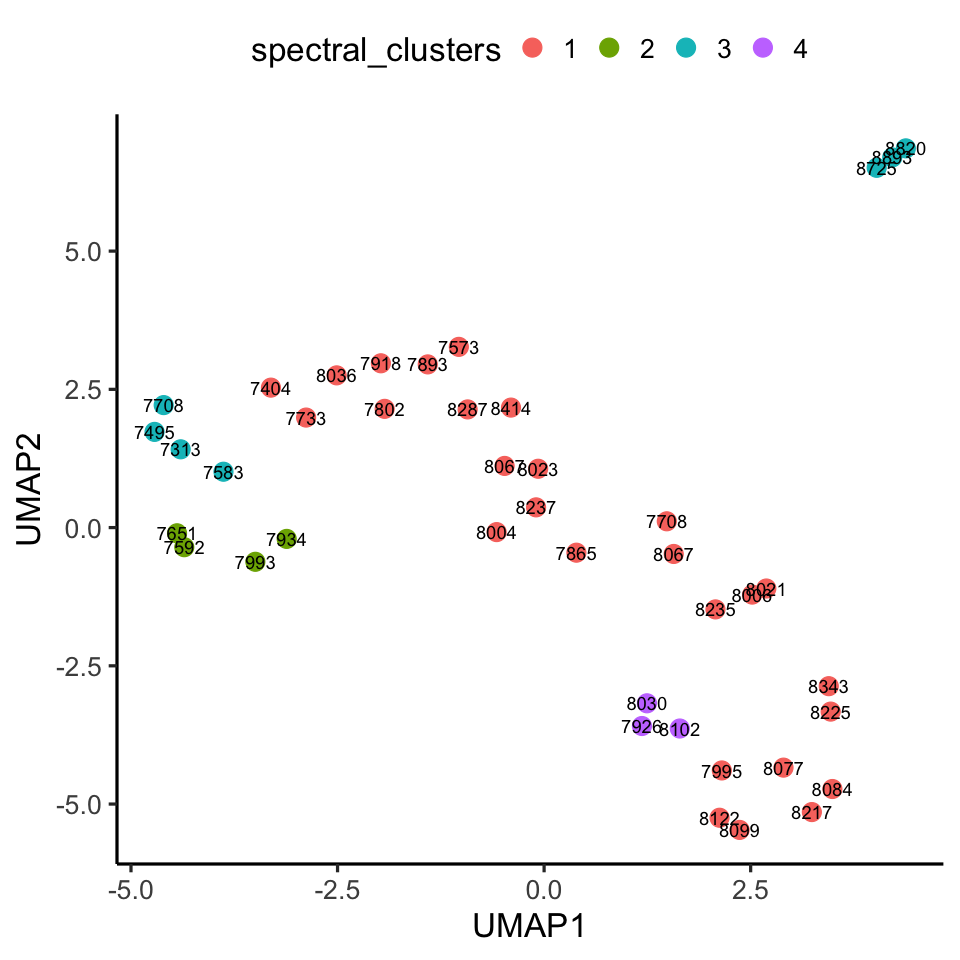

In [976]:
ggplot(decathlon, aes(x=UMAP1, y=UMAP2, color=spectral_clusters, label=Points )) +
  geom_point(size=5) + geom_text(color="black") +
 theme_classic(base_size = 20) +
  theme(legend.position="top")

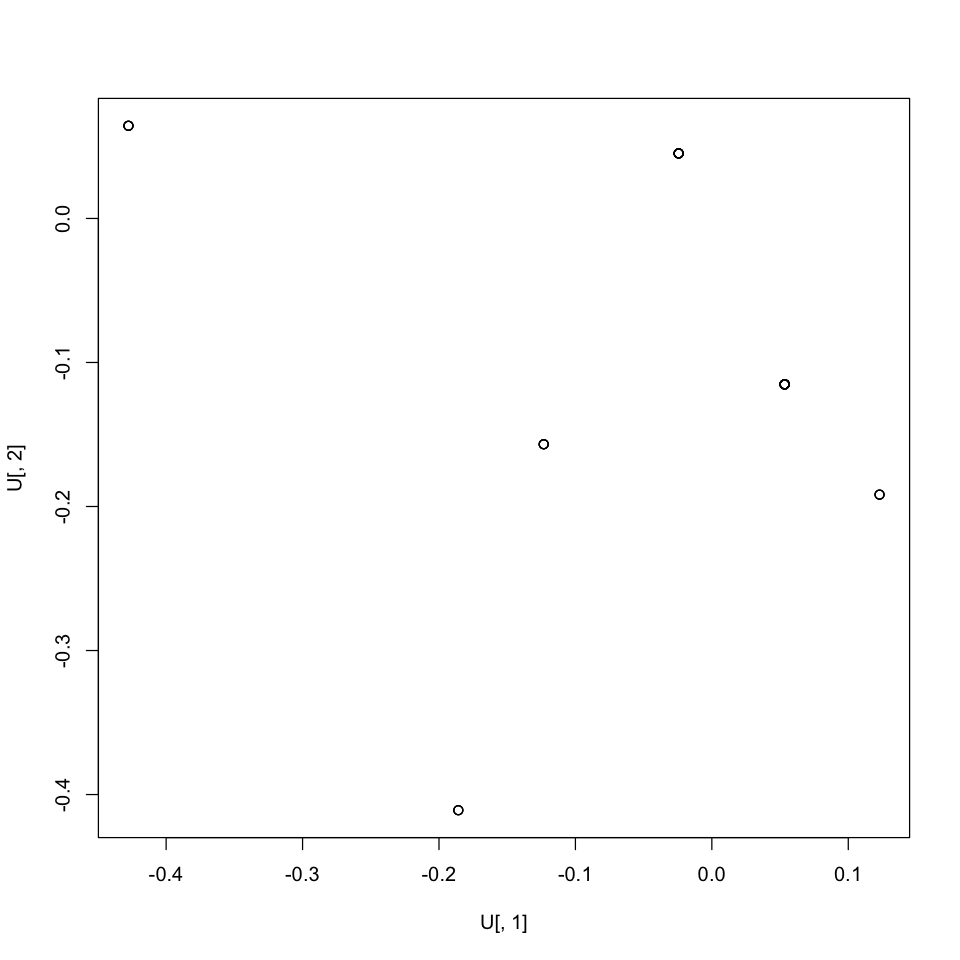

In [977]:
plot(U[,1],U[,2])

In [978]:
library(igraph)

#Create a graph adjacency based on correlation distances between genes in  pairwise fashion.
g <- graph.adjacency(
  as.matrix(A),
  mode="undirected",
  weighted=TRUE,
  diag=FALSE
)

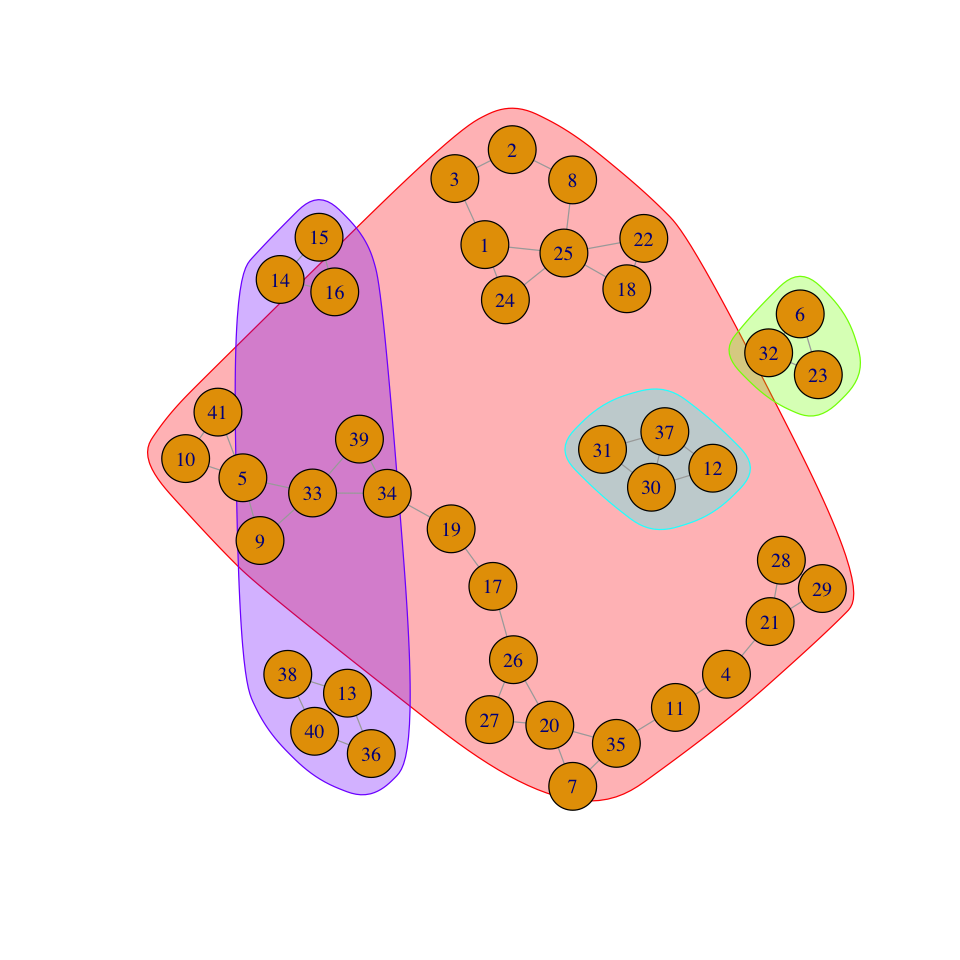

In [994]:
groups_g <- list()
for( i in unique(decathlon[,"spectral_clusters"]))
    groups_g[[i]] <- which(decathlon[,"spectral_clusters"]==i)

plot.igraph(g, mark.groups = groups_g)